# Loading Data & Processing

## importing pkgs

In [62]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()



## Data loading

In [63]:
# ML_DSC_cell
# ====== data loading ====== #
#magic('%reset -sf')

data_files = ['group-a-1.xlsx', 'group-a-2.xlsx', 'group-a-3.xlsx','group-a-4.xlsx',
              'group-b-1.xlsx', 'group-b-2.xlsx', 'group-b-3.xlsx', 'group-b-4.xlsx',
              'group-c-1.xlsx', 'group-c-2.xlsx', 'group-c-3.xlsx', 'group-c-4.xlsx',
              'group-d-1.xlsx', 'group-d-2.xlsx', 'group-d-3.xlsx', 'group-d-4.xlsx']
n_df = len(data_files)

data_files_mg = ['Group-A-1s-0.3r-mg.csv','Group-A-1s-0.5r-mg.csv','Group-A-1s-0.6r-mg.csv','Group-A-1s-1r-mg.csv',
                'Group-B-0.6s-0.3r-mg.csv','Group-B-0.6s-0.5r-mg.csv','Group-B-0.6s-0.6r-mg.csv','Group-B-0.6s-1r-mg.csv',
                'Group-C-0.5s-0.3r-mg.csv','Group-C-0.5s-0.5r-mg.csv','Group-C-0.5s-0.6r-mg.csv','Group-C-0.5s-1r-mg.csv',
                'Group-D-0.3s-0.3r-mg.csv','Group-D-0.3s-0.5r-mg.csv','Group-D-0.3s-0.6r-mg.csv','Group-D-0.3s-1r-mg.csv']



In [64]:
cp_data_mg = pd.read_csv('data/mgma-gd-group.csv')

cp_data_mg.columns=['T','z0l','zl','z0','zu','z0u']
cp_data_mg_gd_z0 = cp_data_mg.iloc[:,3]


## Data appending and wrangling

In [65]:

df_frames = []
for n_df in range(0,n_df):
    df_name = 'df_' + str(n_df+1)
    df_n = pd.read_excel('data/' + data_files[n_df]) #'/content/drive/MyDrive/colab_nb/ml_dsc_cell' +
    df_m = pd.read_csv('data/' + data_files_mg[n_df])
    df_o = cp_data_mg_gd_z0
    df_nmo = pd.concat([df_n, df_m.iloc[:,1:6],df_o], axis=1, ignore_index=True)
    df_nmo.columns=['Temp','Cp-1','Cp-2','Cp-3','Cp-4','Cp-5','Cp-6','Cp-7','Cp-8','r','s','z0l','zl','z0','zu','z0u','z0_gd']
    df_frames.append(df_nmo)
    df = pd.concat(df_frames, axis=0, ignore_index=True)
    df_out = df.to_csv('all_data.csv')
    
    df.head()

# Feature Engineering

In [66]:
# Data check

cp_data = pd.read_csv('data/all_data.csv')

cp_data['Temp[K]'] = cp_data['Temp'] + 273.15

cp_data = cp_data.drop(['z0l', 'zl','z0','zu','z0u', 'Temp'], axis=1)
cp_data = cp_data.drop(columns=cp_data.columns[0], axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0_gd,Temp[K]
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.343676,294.15
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.345330,295.15
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.346649,296.15
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.348169,297.15
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.349595,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.415569,339.15
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.417238,340.15
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416798,341.15
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.417641,342.15


In [67]:
cp_data['Cp_mean'] = cp_data.iloc[:,0:7].mean(axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0_gd,Temp[K],Cp_mean
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.343676,294.15,1.285382
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.345330,295.15,1.286563
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.346649,296.15,1.287926
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.348169,297.15,1.289371
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.349595,298.15,1.290452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.415569,339.15,1.415278
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.417238,340.15,1.418828
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416798,341.15,1.416721
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.417641,342.15,1.417065


## Data cleaning and rearranging

In [68]:

# keeping only data at room temperature 298K
#q = 298.15
#cp_data_rt1 = cp_data[cp_data['Temp[K]']<=q]
#cp_data_rt = cp_data_rt1[cp_data_rt1['Temp[K]']>=q]

cp_data_rt = cp_data.drop('Temp[K]', axis=1)
#cp_data_rt = cp_data_rt.reset_index(drop=True)
cp_data_rt

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0_gd,Cp_mean
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.343676,1.285382
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.345330,1.286563
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.346649,1.287926
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.348169,1.289371
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.349595,1.290452
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.415569,1.415278
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.417238,1.418828
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416798,1.416721
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.417641,1.417065


In [69]:
# calculating the total deviation in the measurement
#cp_only = cp_data_rt.iloc[:,0:8]
#cp_one_clm = pd.Series(cp_only.values.ravel('F'))
#cp_one_clm = pd.DataFrame(cp_one_clm)
cp_st_err = (cp_data_rt['Cp_mean'] / cp_data_rt['z0_gd']) # selecting value from z0_gd
cp_rt_data = pd.concat([cp_data_rt['Cp_mean'],cp_st_err], axis=1, ignore_index=True)
cp_rt_data

,0,1
0,1.285382,0.956616
1,1.286563,0.956318
2,1.287926,0.956393
3,1.289371,0.956387
4,1.290452,0.956177
...,...,...
795,1.415278,0.999795
796,1.418828,1.001122
797,1.416721,0.999946
798,1.417065,0.999593


In [70]:
## appending r and s columns
#r_clm = cp_data_rt['r']
#all_r_clm = pd.concat([r_clm, r_clm, r_clm, r_clm,r_clm, r_clm, r_clm, r_clm,],axis=0,ignore_index=True)

#s_clm= cp_data_rt['s']
#all_s_clm = pd.concat([s_clm, s_clm, s_clm, s_clm,s_clm, s_clm, s_clm, s_clm,],axis=0,ignore_index=True)

## Cean Data Checkpoin

In [71]:
# adding all columns
cp_rt_data1 = pd.concat([cp_rt_data, cp_data_rt['r'], cp_data_rt['s']], axis = 1, ignore_index=False)
cp_rt_data1.columns = ['Cp','St(%)','Ref','Sam']
cp_clean_data = cp_rt_data1.copy() #DATA CHECKPOINT!

In [72]:
R = cp_clean_data['Ref']
S = cp_clean_data['Sam']
cp_clean_data['vol_rel'] = (R*R/S)
cp_clean_data = cp_clean_data.sort_values('St(%)')
cp_clean_data = cp_clean_data.reset_index(drop=True)
cp_clean_data

,Cp,St(%),Ref,Sam,vol_rel
0,1.317002,0.929274,0.3,0.6,0.150000
1,1.315959,0.929633,0.3,0.6,0.150000
2,1.318926,0.929729,0.3,0.6,0.150000
3,1.318454,0.930033,0.3,0.6,0.150000
4,1.317720,0.930069,0.3,0.6,0.150000
...,...,...,...,...,...
795,1.354436,1.000201,1.0,1.0,1.000000
796,1.348441,1.000202,1.0,1.0,1.000000
797,1.352665,1.000250,1.0,1.0,1.000000
798,1.418066,1.000584,1.0,1.0,1.000000


In [73]:
corr_matrix = cp_clean_data.corr()
corr_matrix["vol_rel"].sort_values(ascending=False)


vol_rel    1.000000
Ref        0.819006
St(%)      0.695922
Cp         0.569261
Sam       -0.400089
Name: vol_rel, dtype: float64

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_5816/3765321584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['St(%)'])


<AxesSubplot: xlabel='St(%)', ylabel='Density'>

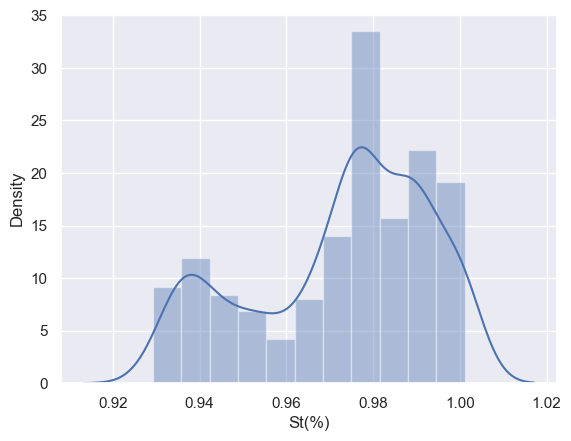

In [74]:
sns.distplot(cp_clean_data['St(%)'])

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_5816/2488532835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['vol_rel'])


<AxesSubplot: xlabel='vol_rel', ylabel='Density'>

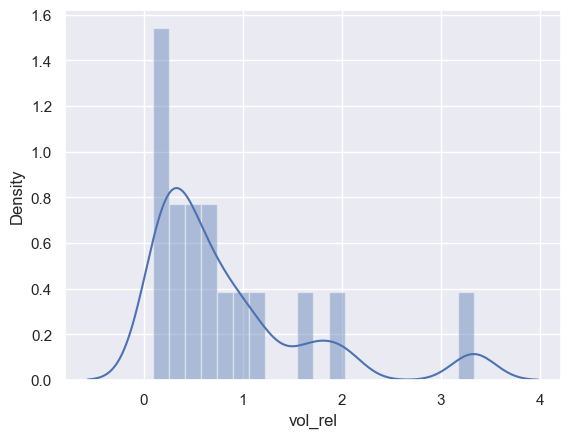

In [75]:
sns.distplot(cp_clean_data['vol_rel'])

##Checking the assumptions!

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_5816/1709502099.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/Users/nirmal/Documents/data_science/microDSC_error_prediction/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


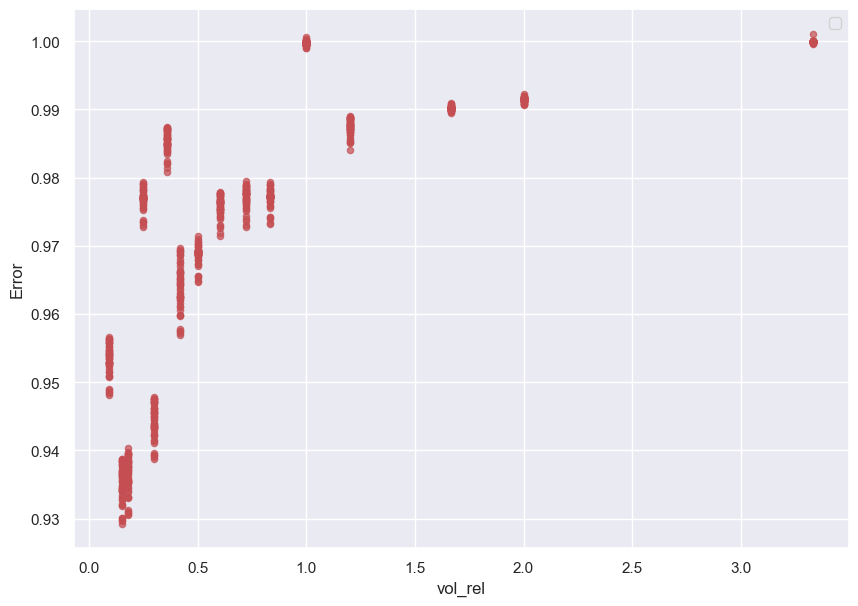

In [76]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("vol_rel")
ax1.set_ylabel("Error")
plt.legend()


/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_5816/930513793.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


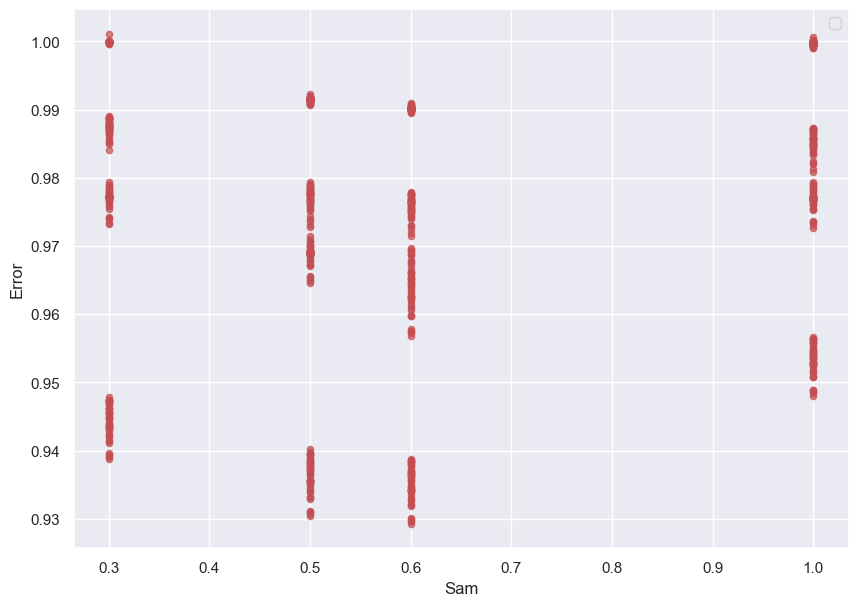

In [77]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_5816/1676528209.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


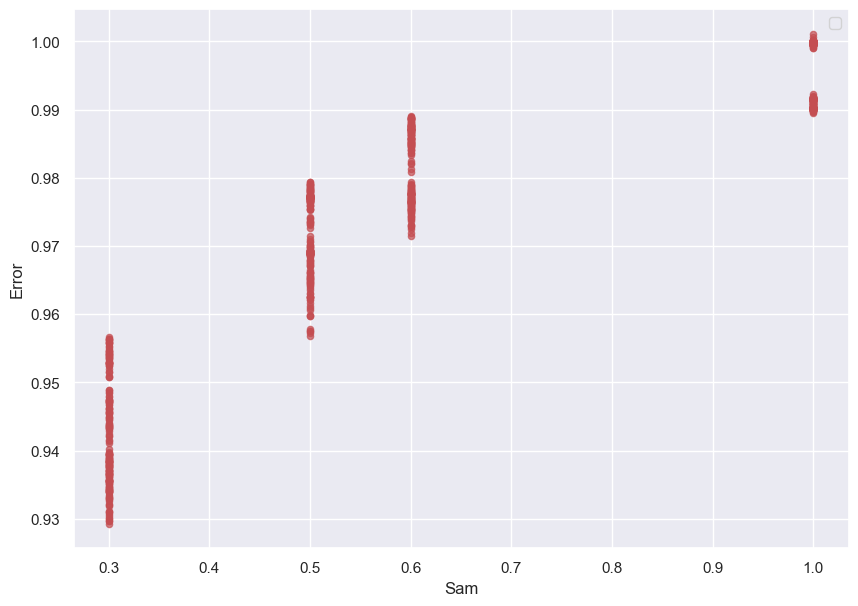

In [78]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


# Train Test & Target Data

In [79]:
# target data

target = cp_clean_data['St(%)']
vol_data = cp_clean_data[['Ref','Sam','vol_rel']]


In [80]:
# splitting data in train and test sets
from sklearn.model_selection import train_test_split 
vol_train, vol_test, target_train, target_test = train_test_split(vol_data, target, test_size=0.2, random_state= 42)

## Data Pipeline for standardlisation




In [81]:
# creating data pipeline for standardlisation process

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('std_scalar', StandardScaler())
])


In [82]:
# scaling the input data
vol_data_scaled = num_pipline.fit_transform(vol_train)

In [83]:
vol_data_scaled

array([[-0.37429572, -0.37809939, -0.41429035],
       [ 1.59892719,  0.01219675,  0.97692528],
       [ 0.02034886,  0.01219675, -0.2950433 ],
       ...,
       [-0.37429572, -0.37809939, -0.41429035],
       [-0.37429572,  1.57338134, -0.71240799],
       [-1.16358489, -1.15869169, -0.65278446]])

# ML Model Check PolyReg

In [84]:
# polyreg model fitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(vol_data_scaled,target_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [85]:
# checking rmse error in fitting
from sklearn.metrics import mean_squared_error
poly_reg_predict = polyreg.predict(vol_data_scaled)
polyreg_mse = mean_squared_error(target_train, poly_reg_predict)
polyreg_rmse = np.sqrt(polyreg_mse)
polyreg_rmse


0.0019193520921457958

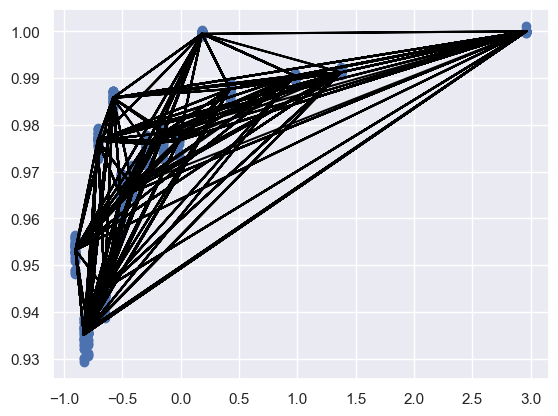

In [86]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(vol_data_scaled[:,2],target_train)
plt.plot(vol_data_scaled[:,2], poly_reg_predict.reshape(-1,1),color='black')
plt.show()

In [87]:
# cross validation of the polyreg model
from sklearn.model_selection import cross_val_score

plyscores = cross_val_score(polyreg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
polyreg_rmse_scores = np.sqrt(-plyscores)
polyreg_rmse_scores

array([0.00179012, 0.00206766, 0.00175333, 0.00188516, 0.00213597])

## ML Model Chek DTR

In [88]:
# Decision tree reg model fitting
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(vol_data_scaled, target_train)

DecisionTreeRegressor()

In [89]:
# checking rmse error of DTR model
from sklearn.metrics import mean_squared_error

err_prediction = tree_reg.predict(vol_data_scaled)
tree_mse = mean_squared_error(target_train, err_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0018206412489951817

## Cross validation

In [90]:
# cross validation of DTR model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.00178364, 0.00194135, 0.00168592, 0.00180536, 0.00205542])

In [91]:
# printing scores of DTR model
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std Dev:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.00178364 0.00194135 0.00168592 0.00180536 0.00205542]
Mean: 0.001854339099909281
Std Dev: 0.000129433899682763


## ML model check RFR

In [92]:
# fitting RFR model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(vol_data_scaled, target_train)

RandomForestRegressor()

In [93]:
# checking rmse error of RFR model
from sklearn.metrics import mean_squared_error

err_prediction = forest_reg.predict(vol_data_scaled)
ftree_mse = mean_squared_error(target_train, err_prediction)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.001820953721180093

## Cross Validation 

In [94]:
# cross validation of RFR
from zmq.constants import SocketOption
from sklearn.model_selection import cross_val_score

fscores = cross_val_score(forest_reg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
ftree_rmse_scores = np.sqrt(-fscores)
ftree_rmse_scores

array([0.00178938, 0.00193803, 0.00168982, 0.00180839, 0.00206012])

In [95]:
def display_scores(fscores):
  print("Scores:", fscores)
  print("Mean:", fscores.mean())
  print("Std Dev:", fscores.std())

display_scores(ftree_rmse_scores)

Scores: [0.00178938 0.00193803 0.00168982 0.00180839 0.00206012]
Mean: 0.0018571469664827582
Std Dev: 0.00012861312912507028


# Test Data Check

### Check PolyReg

In [96]:
vol_test_scaled = num_pipline.transform(vol_test) # data standarlised

In [97]:
polyreg_test_predict = polyreg.predict(vol_test_scaled) # test prediction

poly_rmse = mean_squared_error(target_test, polyreg_test_predict) # error check
poly_rmse = np.sqrt(poly_rmse)
poly_rmse

0.0018185378165212448

### check DTR

In [98]:
dtr_test_predict = tree_reg.predict(vol_test_scaled) # tests prediction
 
tree_mse = mean_squared_error(target_test, dtr_test_predict) # error check
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.001694585446315276

### Check RFR

In [99]:
rfr_test_predict = forest_reg.predict(vol_test_scaled)

ftree_mse = mean_squared_error(target_test, rfr_test_predict)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.0016978393060688493

In [100]:
# for DTR
prediction = pd.DataFrame(dtr_test_predict)
target_test.index = prediction.index
pred_accu = (target_test / prediction) * 100

result = pd.concat([target_test, prediction, pred_accu.iloc[:,0]], axis=1, ignore_index=True)
result.columns = ['Target', 'Predictions-dtr', 'Pred-Accu-(%)']
result

,Target,Predictions-dtr,Pred-Accu-(%)
0,0.991868,0.991492,100.037948
1,0.991361,0.991492,100.037948
2,0.937027,0.935029,106.078814
3,0.985631,0.985209,100.675838
4,0.937177,0.935029,106.078814
...,...,...,...
155,0.988551,0.987404,100.452053
156,1.000584,0.999699,99.216621
157,0.999893,0.999962,99.190537
158,0.984699,0.985209,100.675838


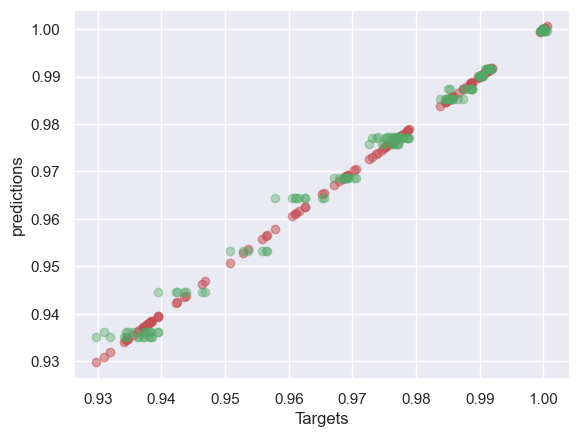

In [101]:
plt.scatter(result['Target'], result['Target'], alpha=0.5, color='r', label='Targets')
plt.scatter(result['Target'], result['Predictions-dtr'], alpha=0.4, color='g', label='Predictions')

plt.ylabel('predictions')
plt.xlabel('Targets')
plt.savefig('ref_dtr.png')

In [102]:
# estimation of R2 score
# DTR
from sklearn.metrics import r2_score
r2_score_test_dtr = r2_score(target_test, dtr_test_predict)
np.round(r2_score_test_dtr,4)

# RFR
r2_score_test_rfr = r2_score(target_test, rfr_test_predict)
np.round(r2_score_test_rfr,4)

# polyreg
r2_score_test_polyreg = r2_score(target_test, polyreg_test_predict)
np.round(r2_score_test_polyreg,4)


0.9925

In [103]:
# estimation of adjusted R2 score
n = np.size(target_test)
k = 3 # number of features

# DTR
adj_r2_score_dtr = 1 - (((1-r2_score_test_dtr)*(n-1))/((n-k-1)))
np.round(adj_r2_score_dtr,4)

# RFR
adj_r2_score_rfr = 1 - (((1-r2_score_test_rfr)*(n-1))/((n-k-1)))
np.round(adj_r2_score_rfr,4)

# Polyreg
adj_r2_score_polyreg = 1 - (((1-r2_score_test_polyreg)*(n-1))/((n-k-1)))
np.round(adj_r2_score_polyreg,4)


0.9923

In [104]:
# values of R2 score 
r2_score_result = [r2_score_test_polyreg, r2_score_test_dtr, r2_score_test_rfr]
np.round(r2_score_result,4)

array([0.9925, 0.9935, 0.9934])

In [105]:
# values of R2adj score
r2_adj_score_result = [adj_r2_score_polyreg, adj_r2_score_dtr, adj_r2_score_rfr]
np.round(r2_adj_score_result, 4)

array([0.9923, 0.9933, 0.9933])

In [106]:
# for DTR
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ML-DTR model:", np.round(uncertainty_model[0],4), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],4), '[%]')

Uncertainty of the ML-DTR model: 2.2338 [%]
Average test prediction precision 97.7662 [%]


In [107]:
# for RFR
prediction_rfr = pd.DataFrame(rfr_test_predict)
target_test.index = prediction_rfr.index
pred_accu = (target_test / prediction_rfr) * 100

result = pd.concat([target_test, prediction_rfr, pred_accu.iloc[:,0]], axis=1, ignore_index=True)
result.columns = ['Target', 'Predictions-RFR', 'Pred-Accu-(%)']
result

,Target,Predictions-RFR,Pred-Accu-(%)
0,0.991868,0.991488,100.038351
1,0.991361,0.991488,100.038351
2,0.937027,0.934933,106.089726
3,0.985631,0.985263,100.670411
4,0.937177,0.934933,106.089726
...,...,...,...
155,0.988551,0.987389,100.453609
156,1.000584,0.999703,99.216265
157,0.999893,0.999963,99.190416
158,0.984699,0.985263,100.670411


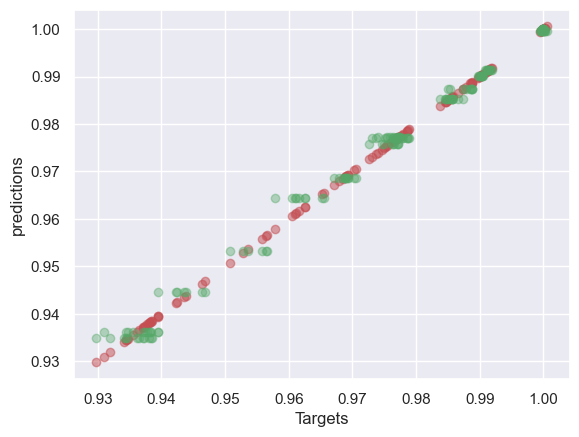

In [108]:
plt.scatter(result['Target'], result['Target'], alpha=0.5, color='r', label='Targets')
plt.scatter(result['Target'], result['Predictions-RFR'], alpha=0.4, color='g', label='Predictions')

plt.ylabel('predictions')
plt.xlabel('Targets')
plt.savefig('ref_rfr.png')

In [109]:
# for DTR
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ML-RFR model:", np.round(uncertainty_model[0],4), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],4), '[%]')

Uncertainty of the ML-RFR model: 2.2367 [%]
Average test prediction precision 97.7633 [%]


In [110]:
# for polyreg
prediction_polyreg = pd.DataFrame(polyreg_test_predict)
target_test.index = prediction_polyreg.index
pred_accu = (target_test / prediction_polyreg) * 100

result = pd.concat([target_test, prediction_polyreg, pred_accu.iloc[:,0]], axis=1, ignore_index=True)
result.columns = ['Target', 'Predictions-PolyReg', 'Pred-Accu-(%)']
result

,Target,Predictions-PolyReg,Pred-Accu-(%)
0,0.991868,0.991210,100.066369
1,0.991361,0.991210,100.066369
2,0.937027,0.935105,106.070255
3,0.985631,0.985756,100.619975
4,0.937177,0.935105,106.070255
...,...,...,...
155,0.988551,0.987645,100.427576
156,1.000584,0.999458,99.240565
157,0.999893,0.999989,99.187848
158,0.984699,0.985756,100.619975


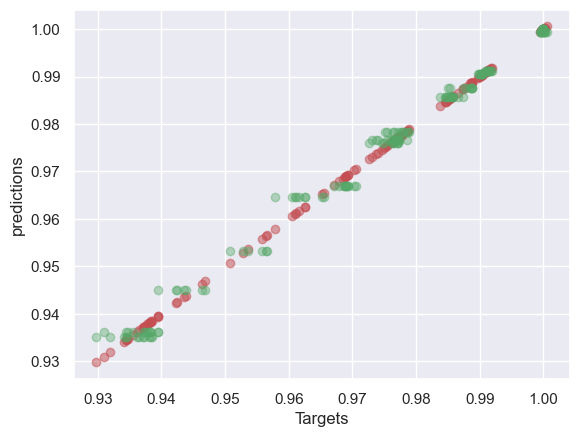

In [111]:
plt.scatter(result['Target'], result['Target'], alpha=0.5, color='r', label='Targets')
plt.scatter(result['Target'], result['Predictions-PolyReg'], alpha=0.4, color='g', label='Predictions')

plt.ylabel('predictions')
plt.xlabel('Targets')
plt.savefig('ref_plyreg.png')

In [112]:
# for polyreg
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the polyreg model:", np.round(uncertainty_model[0],4), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],4), '[%]')

Uncertainty of the polyreg model: 2.2344 [%]
Average test prediction precision 97.7656 [%]


In [113]:
result_all = pd.concat([target_test, prediction_polyreg, prediction, prediction_rfr], axis=1, ignore_index=True)
result_all.columns = ['Target', 'Prediction_pr', 'Prediction_dtr', 'Prediction_rfr']
result_all

,Target,Prediction_pr,Prediction_dtr,Prediction_rfr
0,0.991868,0.991210,0.991492,0.991488
1,0.991361,0.991210,0.991492,0.991488
2,0.937027,0.935105,0.935029,0.934933
3,0.985631,0.985756,0.985209,0.985263
4,0.937177,0.935105,0.935029,0.934933
...,...,...,...,...
155,0.988551,0.987645,0.987404,0.987389
156,1.000584,0.999458,0.999699,0.999703
157,0.999893,0.999989,0.999962,0.999963
158,0.984699,0.985756,0.985209,0.985263


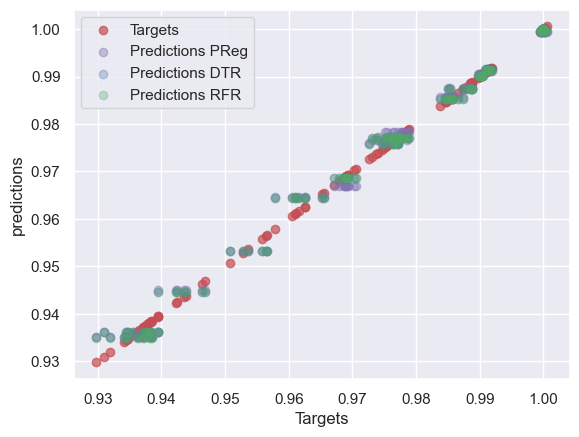

In [124]:
plt.scatter(result_all['Target'], result_all['Target'], alpha=0.7, color='r', label='Targets')
plt.scatter(result_all['Target'], result_all.iloc[:,1], alpha=0.4, color='m', label='Predictions PReg')
plt.scatter(result_all['Target'], result_all.iloc[:,2], alpha=0.3, color='b', label='Predictions DTR')
plt.scatter(result_all['Target'], result_all.iloc[:,3], alpha=0.3, color='g', label='Predictions RFR')
plt.ylabel('predictions')
plt.xlabel('Targets')
plt.legend()
plt.savefig('prediction_all_ml.png')

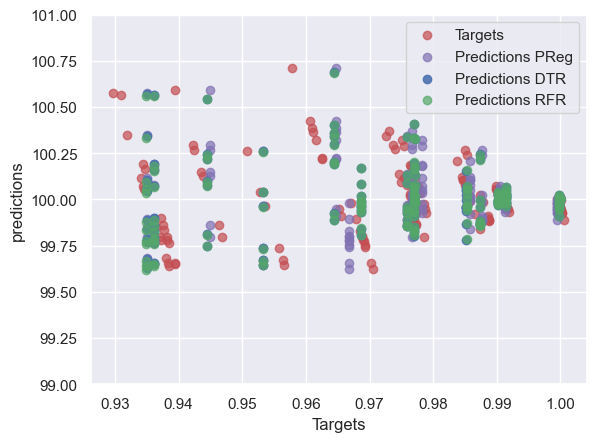

In [123]:
plt.scatter(result_all['Target'], (result_all.iloc[:,1]  /result_all['Target'])*100, alpha=0.7, color='r', label='Targets')
plt.scatter(result_all.iloc[:,1] , (result_all.iloc[:,1] /result_all['Target'])*100, alpha=0.7, color='m', label='Predictions PReg')
plt.scatter(result_all.iloc[:,2] , (result_all.iloc[:,2] /result_all['Target'])*100, alpha=0.9, color='b', label='Predictions DTR')
plt.scatter(result_all.iloc[:,3] , (result_all.iloc[:,3] /result_all['Target'])*100, alpha=0.7, color='g', label='Predictions RFR')
plt.ylabel('predictions')
plt.xlabel('Targets')
plt.ylim(99,101)
plt.legend()
plt.savefig('prediction_all_ml_1.png')

## Model Deployment

In [116]:
import joblib

In [117]:
joblib.dump(tree_reg,'dsc_error_dtr.pkl') # DTR model pkl

['dsc_error_dtr.pkl']

In [118]:
joblib.dump(num_pipline,'scaler.pkl') #scaler for standarlisation model pkl

['scaler.pkl']